In [2]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 160
%matplotlib inline

<p1>Найдем выражение для скорости</p1>

$l=F\dfrac{\lambda}{\Lambda} \Rightarrow v = \dfrac{f\lambda \nu}{l}$

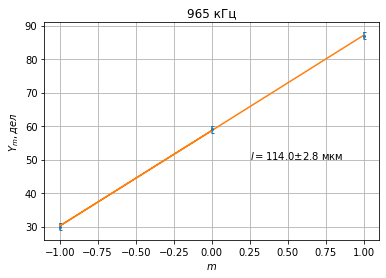

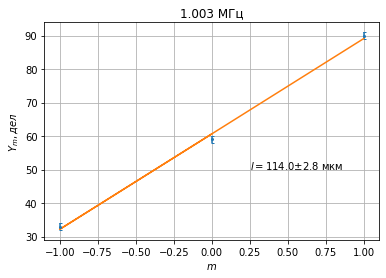

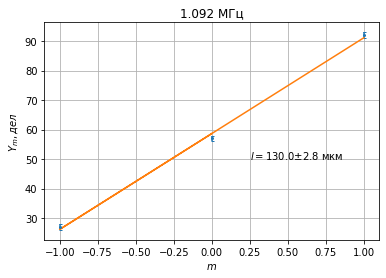

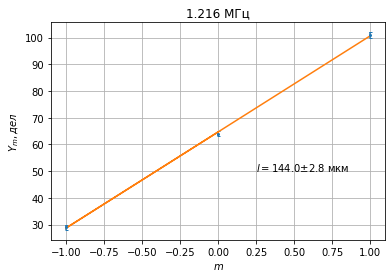

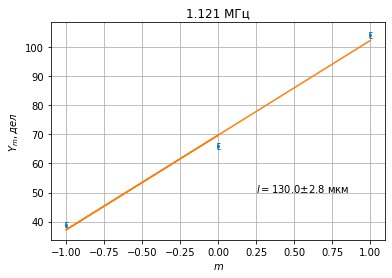

[1516.9122807017548, 1576.6456140350879, 1505.2799999968183, 1513.244444441236, 1545.255384612118]


In [3]:
#constants
F = 28 #cm
micro = 4 #micron

def line(arr, p1, p2):
    return p1 * arr + p2

def drawPlot(y_arr, string, row, col):
    plt.errorbar(m, y_arr, yerr=1, fmt='o', markersize=2, capsize=1.5)
    plt.grid()
    plt.title(string)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$Y_m, дел$')
    
    #curve fit
    popt, pcov = curve_fit(line, m, y_arr, absolute_sigma=True, sigma=[1]*len(m))
    plt.plot(m, line(m, *popt))
    plt.text(0.25, 50, r'$l = $' + '%.1f' % (popt[0]*micro) + r'$\pm$' + '%.1f' % (np.sqrt(pcov[0][0])*micro) + ' мкм')
    l.append((popt[0] * micro, np.sqrt(pcov[0][0]) * micro)) #micro
    plt.savefig('maxim' + str(row) + str(col) + '.png')
    plt.show()
    
l = []
m = np.array([0, -1, 1])
nu = np.array([.965, 1.003, 1.092, 1.216, 1.121])
# 1
y = np.array([59, 30, 87])
drawPlot(y, '965 кГц', 0, 0)
# 2
y = np.array([59, 33, 90])
drawPlot(y, '1.003 МГц', 0, 1)
# 3
y = np.array([57, 27, 92]) #gone
drawPlot(y, '1.092 МГц', 1, 0)
#4
y = np.array([64, 29, 101])
drawPlot(y, '1.216 МГц', 1, 1)
#5
y = np.array([66, 39, 104])
drawPlot(y, '1.121 МГц', 2, 0)

v = [(F * 1e-2) * (6400*1e-10) * nu[i] * 1e6 / (l[i][0] * 1e-6) for i in range(len(l))]
print(v)
v = np.array(v)

v = 1531.47 +_ 89.02


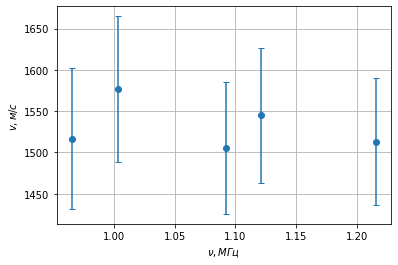

In [4]:
delta_v = [(200 / 6400 + l[i][1]/l[i][0])*v[i] for i in range(len(l))]
plt.errorbar(nu, v, yerr=delta_v, fmt='o', capsize=3)
plt.grid()
plt.xlabel(r'$\nu, МГц$')
plt.ylabel(r'$v, м/с$')
print('v = %.2f' % v.mean(), '+_ %.2f' % np.sqrt(v.std() ** 2 + delta_v[0] ** 2))
plt.savefig('result.png')
plt.show()